# Total Production Units for Self-Consumption

### Master in Data Science and Engineering - FEUP

#### Group 4
202107955 - Beatriz Iara Nunes Silva
\
202206252 - Inês Clotilde da Costa Neves
\
202502527 - Kirill Savin
\
202502528 - Mariana Rocha Cristino
\
202202895 - Patrícia Crespo da Silva

<div id="top"></div>

# Table of Content

<ol>
    <li><h3><a href="#introduction">Introduction</a></h3></li>
    <li><h3><a href="#research">Research Questions</a></h3></li>
    <li><h3><a href="#data">Data</a></h3></li>
    <li><h3><a href="#inference">Inferences</a></h3></li>
    <li><h3><a href="#results">Results and Discussion</a></h3></li>
    <li><h3><a href="#conclusion">Conclusion</a></h3></li>    

</ol>

# Introduction


<div id="research"></div>
<strong><a href="#top">Back to top</a></strong>

# Research Questions

# Research Questions

**General Research Question:**
* RQ: Compare how seasonal (winter vs summer), regional, and technical factors shape self-consumption energy production patterns in Portugal between 2023 and 2024.

**Specifics Research Questions:**
* RQ1: Compare the average installed capacity per UPAC across different power levels and districts in 2023 and 2024. - Kirill
* RQ2: Compare the evolution of installed capacity between 2023 and 2024 across residential and industrial UPACs to assess differences in growth patterns. - Iara and Mariana
* RQ3: Compare the total installed capacity for self-consumption across different power scales (installed capacity ranges) and seasons (winter vs. summer) in selected Portuguese districts during 2023 and 2024. - Inês and Patrícia

Districts for SRQ: Aveiro, Évora, Vila Real and Faro

<div id="research"></div>
<strong><a href="#top">Back to top</a></strong>

# Data

## Libraries

In [58]:
#import geopandas as gpd
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from matplotlib import patheffects
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.stats as stats
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import scikit_posthocs as sp
from scipy.stats import kruskal, levene
from statsmodels.formula.api import ols

## Prepare Data

Reading the dataset:

In [59]:
df_origin = pd.read_csv('../Data/UPAC_Total_Production.csv', sep=';', decimal='.')
df_origin.head(10)

,Quarter,District,Municipality,Parish,Zip Code,Technology Type,Voltage level,Installed power range (kW),Number of installations,Total installed power (kW),DistrictCode,Municipality Code,DistrictMunicipalityParishCode,CPEs (#),relacao_instalacoes_por_cpe,relacao_potencia_por_cpe
0,2023T1,Coimbra,Condeixa-a-Nova,Furadouro,3150,Solar,BTN,"]0, 4]",2,3.0000,6,604,060407,9537.0000,0.0002,0.0003
1,2023T1,Coimbra,Condeixa-a-Nova,Zambujal,3150,Solar,BTN,"]0, 4]",2,4.3200,6,604,060410,9537.0000,0.0002,0.0005
2,2023T1,Coimbra,Condeixa-a-Nova,Condeixa-a-Velha e Condeixa-a-Nova,3150,Não Atribuído,BTN,"]0, 4]",1,1.0500,6,604,060411,9537.0000,0.0001,0.0001
3,2023T1,Coimbra,Condeixa-a-Nova,Vila Seca e Bem da Fé,3150,Solar,BTN,"]0, 4]",17,28.1400,6,604,060413,9537.0000,0.0018,0.0030
4,2023T1,Coimbra,Figueira da Foz,São Pedro,3090,Não Atribuído,BTN,"]0, 4]",2,3.2800,6,605,060514,50436.0000,0.0000,0.0001
5,2023T1,Coimbra,Figueira da Foz,Moinhos da Gândara,3080,Não Atribuído,BTN,"]0, 4]",1,2.0000,6,605,060518,50436.0000,0.0000,0.0000
6,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,3080,Não Atribuído,BTN,"]0, 4]",9,13.5900,6,605,060520,50436.0000,0.0002,0.0003
7,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,3080,Solar,BTN,"]0, 4]",128,202.5100,6,605,060520,50436.0000,0.0025,0.0040
8,2023T1,Coimbra,Figueira da Foz,Ferreira-a-Nova,3090,Não Atribuído,BTN,"]0, 4]",3,4.9600,6,605,060521,50436.0000,0.0001,0.0001
9,2023T1,Coimbra,Figueira da Foz,Lavos,3090,Solar,BTN,"]0, 4]",93,112.5100,6,605,060522,50436.0000,0.0018,0.0022


Rename the last two columns to English - Iara

In [60]:
df_origin = df_origin.rename(columns={
    "relacao_instalacoes_por_cpe": "installations_per_cpe_ratio",
    "relacao_potencia_por_cpe": "power_per_cpe_ratio"
})
print(df_origin.columns)

Index(['Quarter', 'District', 'Municipality', 'Parish', 'Zip Code',
       'Technology Type', 'Voltage level', 'Installed power range (kW)',
       'Number of installations', 'Total installed power (kW)', 'DistrictCode',
       'Municipality Code', 'DistrictMunicipalityParishCode', 'CPEs (#)',
       'installations_per_cpe_ratio', 'power_per_cpe_ratio'],
      dtype='object')


Dataset info - Mariana and Patrícia

In [61]:
print("\nDataset info:")
print(df_origin.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121294 entries, 0 to 121293
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Quarter                         121294 non-null  object 
 1   District                        121294 non-null  object 
 2   Municipality                    121294 non-null  object 
 3   Parish                          121294 non-null  object 
 4   Zip Code                        121294 non-null  int64  
 5   Technology Type                 121283 non-null  object 
 6   Voltage level                   121292 non-null  object 
 7   Installed power range (kW)      121294 non-null  object 
 8   Number of installations         121294 non-null  int64  
 9   Total installed power (kW)      121294 non-null  float64
 10  DistrictCode                    121294 non-null  int64  
 11  Municipality Code               121294 non-null  int64  
 12  D

Non-Numeric Columns - Iara

In [62]:
non_numeric = df_origin.select_dtypes(exclude=['number'])


for col in non_numeric.columns:
    unique_vals = df_origin[col].unique().tolist()
    print(f"Column: {col} — {len(unique_vals)} unique values")
    print(unique_vals)
    print("-" * 40)

Column: Quarter — 11 unique values
['2023T1', '2023T2', '2024T2', '2024T3', '2024T4', '2023T3', '2023T4', '2024T1', '2025T1', '2025T2', '2022T4']
----------------------------------------
Column: District — 18 unique values
['Coimbra', 'Évora', 'Faro', 'Guarda', 'Leiria', 'Lisboa', 'Portalegre', 'Porto', 'Santarém', 'Setúbal', 'Viana do Castelo', 'Vila Real', 'Viseu', 'Aveiro', 'Beja', 'Braga', 'Bragança', 'Castelo Branco']
----------------------------------------
Column: Municipality — 278 unique values
['Condeixa-a-Nova', 'Figueira da Foz', 'Lousã', 'Mira', 'Miranda do Corvo', 'Montemor-o-Velho', 'Oliveira do Hospital', 'Pampilhosa da Serra', 'Penacova', 'Penela', 'Soure', 'Tábua', 'Vila Nova de Poiares', 'Alandroal', 'Arraiolos', 'Borba', 'Estremoz', 'Évora', 'Montemor-o-Novo', 'Mora', 'Portel', 'Redondo', 'Reguengos de Monsaraz', 'Vendas Novas', 'Viana do Alentejo', 'Vila Viçosa', 'Albufeira', 'Alcoutim', 'Aljezur', 'Castro Marim', 'Faro', 'Lagoa', 'Lagos', 'Loulé', 'Monchique', 'Ol

Translation Dictionary Technology Type - Iara

In [63]:
tech_type_translation = {
    'Solar': 'Solar',
    'Não Atribuído': 'Not Assigned',
    'Eólica': 'Wind',
    'Biogás': 'Biogas',
    'Cogeração não renovável': 'Non-renewable Cogeneration',
    'Hídrica': 'Hydro',
    'Biomassa': 'Biomass',
    'Fotovoltaica': 'Photovoltaic'
}

df_origin['Technology Type'] = df_origin['Technology Type'].map(tech_type_translation).fillna(df_origin['Technology Type'])
print(df_origin['Technology Type'].unique())


['Solar' 'Not Assigned' 'Wind' 'Biogas' 'Non-renewable Cogeneration'
 'Hydro' 'Biomass' 'Photovoltaic' nan]


### Data Selection

Removing unnecessary columns - All of us (Patrícia include the last 3, Iara and Inês didn't)

In [64]:
cols_to_keep = [
    "Quarter",
    "District",
    "Municipality",
    "Parish",
    "Technology Type",
    "Voltage level",
    "Installed power range (kW)",
    "Number of installations",
    "Total installed power (kW)",
    "CPEs (#)",
    "installations_per_cpe_ratio",
    "power_per_cpe_ratio"
]

df_filtered = df_origin[cols_to_keep]
df_filtered.head(10)

,Quarter,District,Municipality,Parish,Technology Type,Voltage level,Installed power range (kW),Number of installations,Total installed power (kW),CPEs (#),installations_per_cpe_ratio,power_per_cpe_ratio
0,2023T1,Coimbra,Condeixa-a-Nova,Furadouro,Solar,BTN,"]0, 4]",2,3.0000,9537.0000,0.0002,0.0003
1,2023T1,Coimbra,Condeixa-a-Nova,Zambujal,Solar,BTN,"]0, 4]",2,4.3200,9537.0000,0.0002,0.0005
2,2023T1,Coimbra,Condeixa-a-Nova,Condeixa-a-Velha e Condeixa-a-Nova,Not Assigned,BTN,"]0, 4]",1,1.0500,9537.0000,0.0001,0.0001
3,2023T1,Coimbra,Condeixa-a-Nova,Vila Seca e Bem da Fé,Solar,BTN,"]0, 4]",17,28.1400,9537.0000,0.0018,0.0030
4,2023T1,Coimbra,Figueira da Foz,São Pedro,Not Assigned,BTN,"]0, 4]",2,3.2800,50436.0000,0.0000,0.0001
5,2023T1,Coimbra,Figueira da Foz,Moinhos da Gândara,Not Assigned,BTN,"]0, 4]",1,2.0000,50436.0000,0.0000,0.0000
6,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,Not Assigned,BTN,"]0, 4]",9,13.5900,50436.0000,0.0002,0.0003
7,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,Solar,BTN,"]0, 4]",128,202.5100,50436.0000,0.0025,0.0040
8,2023T1,Coimbra,Figueira da Foz,Ferreira-a-Nova,Not Assigned,BTN,"]0, 4]",3,4.9600,50436.0000,0.0001,0.0001
9,2023T1,Coimbra,Figueira da Foz,Lavos,Solar,BTN,"]0, 4]",93,112.5100,50436.0000,0.0018,0.0022


Selecting years of interest - All of us

In [65]:
df_filtered = df_filtered[df_filtered['Quarter'].str.startswith(('2023', '2024'))].copy()
print(df_filtered['Quarter'].value_counts())

Quarter
2023T3    13295
2024T4    11737
2024T3    11399
2024T2    11086
2024T1    10839
2023T1    10481
2023T4    10407
2023T2     9301
Name: count, dtype: int64


### Data Inspection and Cleaning

Checking for missing values - All of us

In [66]:
missing_df = pd.DataFrame({
    'Missing Values': df_filtered.isnull().sum(),
    'Percentage': (df_filtered.isnull().sum() / len(df_filtered)) * 100
})
print("\nMissing Values summary:")
display(missing_df[missing_df['Missing Values'] > 0])


Missing Values summary:


,Missing Values,Percentage
Voltage level,2,0.0023


In [67]:
print("Before dropping NA:", df_filtered.shape)
df_filtered = df_filtered.dropna()
print("After dropping NA:", df_filtered.shape)

Before dropping NA: (88545, 12)
After dropping NA: (88543, 12)


Check for duplicate rows - Inês and Iara

In [68]:
duplicates = df_filtered[df_filtered.duplicated()]
print(duplicates)
print("Number of duplicates:", df_filtered.duplicated().sum())

       Quarter  District         Municipality  \
3666    2024T2     Braga             Barcelos   
9221    2024T4    Lisboa                Mafra   
11106   2023T4      Faro                Loulé   
14824   2024T2      Faro                Loulé   
43536   2024T3  Santarém  Salvaterra de Magos   
44840   2023T2     Évora                Évora   
45738   2023T2     Braga            Guimarães   
54983   2024T1      Faro                Loulé   
56600   2024T1    Lisboa               Lisboa   
57315   2023T3     Porto           Matosinhos   
59164   2023T4     Évora                Évora   
62981   2024T2    Lisboa               Loures   
67272   2024T3    Lisboa               Lisboa   
68366   2024T3    Lisboa              Amadora   
87473   2023T4     Braga             Barcelos   
94814   2024T1    Lisboa              Amadora   
96966   2024T2  Santarém  Salvaterra de Magos   
97491   2024T2    Lisboa               Lisboa   
97935   2023T4    Lisboa              Amadora   
99945   2024T1    Li

In [69]:
print("Before dropping duplicates:", df_filtered.shape)
df_filtered = df_filtered.drop_duplicates()
print("After dropping duplicates:", df_filtered.shape)

Before dropping duplicates: (88543, 12)
After dropping duplicates: (88511, 12)


### Derived Metrics - Iara

**Percentage of Installations by Voltage Level per District**

According to E-redes ([Manual de Ligações à Rede](https://provedordocliente.e-redes.pt/Files/PDF/Manual-de-Ligacoes-a-Rede.pdf)):

*High Voltage (AT)*
- Companies with capacities >10 MVA, supplied at 60 kV.
- Clear proxy for heavy industry or large commercial facilities.
- Districts with a higher proportion of AT installations → more industrialized.

*Medium Voltage (MT)*
- Companies with capacities >200 kVA, voltages of 10–30 kV.
- Also indicates industrial activity or large commercial companies.
- Complements AT; districts with a higher proportion of MT → more industrialized areas, but less intense than AT.

*Low Voltage Normal (BTN) and Low Voltage Special (BTE)*
- **BTN** → residences, small shops/offices.
- **BTE** → small/medium companies (>41.4 kVA).
- Districts dominated by BTN → mainly residential areas.
- BTE is mixed, can indicate areas with small industries or commerce, but less significant than MT/AT.


In [70]:
# Make a copy
df = df_filtered.copy()

# Group by Quarter, District, and Voltage level, summing the Number of installations
grouped = (
    df.groupby(['Quarter', 'District', 'Voltage level'], as_index=False)['Number of installations'].sum()
)

# Pivot table to have Voltage levels as columns
pivot = grouped.pivot_table(
    index=['Quarter', 'District'],
    columns='Voltage level',
    values='Number of installations',
    fill_value=0
).reset_index()

# Ensure all expected voltage columns exist
for col in ['AT', 'MT', 'BTN', 'BTE']:
    if col not in pivot.columns:
        pivot[col] = 0

# Calculate total installations per row
pivot['Total'] = pivot[['AT','MT','BTN','BTE']].sum(axis=1)

# Calculate percentage per voltage level
pivot["District_High_Voltage_AT(%)"] = pivot['AT'] / pivot['Total'] * 100
pivot["District_Medium_Voltage_MT(%)"] = pivot['MT'] / pivot['Total'] * 100
pivot["District_Low_Voltage_BTN(%)"] = pivot['BTN'] / pivot['Total'] * 100
pivot["District_Low_Voltage_BTE(%)"] = pivot['BTE'] / pivot['Total'] * 100

# Select only the relevant columns
df_result = pivot[['Quarter', 'District',
                   'District_High_Voltage_AT(%)',
                   'District_Medium_Voltage_MT(%)',
                   'District_Low_Voltage_BTN(%)',
                   'District_Low_Voltage_BTE(%)']]

df_result


Voltage level,Quarter,District,District_High_Voltage_AT(%),District_Medium_Voltage_MT(%),District_Low_Voltage_BTN(%),District_Low_Voltage_BTE(%)
0,2023T1,Aveiro,0.0527,3.8198,94.3625,1.7650
1,2023T1,Beja,0.0000,3.4156,92.9791,3.6053
2,2023T1,Braga,0.0225,2.2018,96.5649,1.2107
3,2023T1,Bragança,0.0000,1.6402,95.8994,2.4604
4,2023T1,Castelo Branco,0.0648,2.4288,95.4016,2.1049
...,...,...,...,...,...,...
139,2024T4,Setúbal,0.0273,1.3055,97.6437,1.0235
140,2024T4,Viana do Castelo,0.0148,1.7290,97.1036,1.1527
141,2024T4,Vila Real,0.0000,1.6510,97.1350,1.2140
142,2024T4,Viseu,0.0165,2.6020,96.2415,1.1399


In [71]:
df_final = df_filtered.merge(df_result, on=['Quarter', 'District'], how='left')
df_final.head(10)

,Quarter,District,Municipality,Parish,Technology Type,Voltage level,Installed power range (kW),Number of installations,Total installed power (kW),CPEs (#),installations_per_cpe_ratio,power_per_cpe_ratio,District_High_Voltage_AT(%),District_Medium_Voltage_MT(%),District_Low_Voltage_BTN(%),District_Low_Voltage_BTE(%)
0,2023T1,Coimbra,Condeixa-a-Nova,Furadouro,Solar,BTN,"]0, 4]",2,3.0000,9537.0000,0.0002,0.0003,0.0411,1.7967,96.8729,1.2893
1,2023T1,Coimbra,Condeixa-a-Nova,Zambujal,Solar,BTN,"]0, 4]",2,4.3200,9537.0000,0.0002,0.0005,0.0411,1.7967,96.8729,1.2893
2,2023T1,Coimbra,Condeixa-a-Nova,Condeixa-a-Velha e Condeixa-a-Nova,Not Assigned,BTN,"]0, 4]",1,1.0500,9537.0000,0.0001,0.0001,0.0411,1.7967,96.8729,1.2893
3,2023T1,Coimbra,Condeixa-a-Nova,Vila Seca e Bem da Fé,Solar,BTN,"]0, 4]",17,28.1400,9537.0000,0.0018,0.0030,0.0411,1.7967,96.8729,1.2893
4,2023T1,Coimbra,Figueira da Foz,São Pedro,Not Assigned,BTN,"]0, 4]",2,3.2800,50436.0000,0.0000,0.0001,0.0411,1.7967,96.8729,1.2893
5,2023T1,Coimbra,Figueira da Foz,Moinhos da Gândara,Not Assigned,BTN,"]0, 4]",1,2.0000,50436.0000,0.0000,0.0000,0.0411,1.7967,96.8729,1.2893
6,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,Not Assigned,BTN,"]0, 4]",9,13.5900,50436.0000,0.0002,0.0003,0.0411,1.7967,96.8729,1.2893
7,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,Solar,BTN,"]0, 4]",128,202.5100,50436.0000,0.0025,0.0040,0.0411,1.7967,96.8729,1.2893
8,2023T1,Coimbra,Figueira da Foz,Ferreira-a-Nova,Not Assigned,BTN,"]0, 4]",3,4.9600,50436.0000,0.0001,0.0001,0.0411,1.7967,96.8729,1.2893
9,2023T1,Coimbra,Figueira da Foz,Lavos,Solar,BTN,"]0, 4]",93,112.5100,50436.0000,0.0018,0.0022,0.0411,1.7967,96.8729,1.2893


**Map Quarters to Seasons** - Iara

In [72]:
# Function to convert Quarter to Season
def quarter_to_season(quarter):
    if quarter.endswith('T1') or quarter.endswith('T2'):
        return 'Winter'
    elif quarter.endswith('T3') or quarter.endswith('T4'):
        return 'Summer'
    else:
        return 'Unknown'

# Apply the function to create a new Season column
df_final['Season'] = df_final['Quarter'].apply(quarter_to_season)

# Display first 10 rows
df_final.head(10)


,Quarter,District,Municipality,Parish,Technology Type,Voltage level,Installed power range (kW),Number of installations,Total installed power (kW),CPEs (#),installations_per_cpe_ratio,power_per_cpe_ratio,District_High_Voltage_AT(%),District_Medium_Voltage_MT(%),District_Low_Voltage_BTN(%),District_Low_Voltage_BTE(%),Season
0,2023T1,Coimbra,Condeixa-a-Nova,Furadouro,Solar,BTN,"]0, 4]",2,3.0000,9537.0000,0.0002,0.0003,0.0411,1.7967,96.8729,1.2893,Winter
1,2023T1,Coimbra,Condeixa-a-Nova,Zambujal,Solar,BTN,"]0, 4]",2,4.3200,9537.0000,0.0002,0.0005,0.0411,1.7967,96.8729,1.2893,Winter
2,2023T1,Coimbra,Condeixa-a-Nova,Condeixa-a-Velha e Condeixa-a-Nova,Not Assigned,BTN,"]0, 4]",1,1.0500,9537.0000,0.0001,0.0001,0.0411,1.7967,96.8729,1.2893,Winter
3,2023T1,Coimbra,Condeixa-a-Nova,Vila Seca e Bem da Fé,Solar,BTN,"]0, 4]",17,28.1400,9537.0000,0.0018,0.0030,0.0411,1.7967,96.8729,1.2893,Winter
4,2023T1,Coimbra,Figueira da Foz,São Pedro,Not Assigned,BTN,"]0, 4]",2,3.2800,50436.0000,0.0000,0.0001,0.0411,1.7967,96.8729,1.2893,Winter
5,2023T1,Coimbra,Figueira da Foz,Moinhos da Gândara,Not Assigned,BTN,"]0, 4]",1,2.0000,50436.0000,0.0000,0.0000,0.0411,1.7967,96.8729,1.2893,Winter
6,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,Not Assigned,BTN,"]0, 4]",9,13.5900,50436.0000,0.0002,0.0003,0.0411,1.7967,96.8729,1.2893,Winter
7,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,Solar,BTN,"]0, 4]",128,202.5100,50436.0000,0.0025,0.0040,0.0411,1.7967,96.8729,1.2893,Winter
8,2023T1,Coimbra,Figueira da Foz,Ferreira-a-Nova,Not Assigned,BTN,"]0, 4]",3,4.9600,50436.0000,0.0001,0.0001,0.0411,1.7967,96.8729,1.2893,Winter
9,2023T1,Coimbra,Figueira da Foz,Lavos,Solar,BTN,"]0, 4]",93,112.5100,50436.0000,0.0018,0.0022,0.0411,1.7967,96.8729,1.2893,Winter


Check final data types

In [73]:
df_final.dtypes

Quarter                           object
District                          object
Municipality                      object
Parish                            object
Technology Type                   object
Voltage level                     object
Installed power range (kW)        object
Number of installations            int64
Total installed power (kW)       float64
CPEs (#)                         float64
installations_per_cpe_ratio      float64
power_per_cpe_ratio              float64
District_High_Voltage_AT(%)      float64
District_Medium_Voltage_MT(%)    float64
District_Low_Voltage_BTN(%)      float64
District_Low_Voltage_BTE(%)      float64
Season                            object
dtype: object

**Summary of numeric variables** - Patrícia

In [74]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Number of installations,88511.0000,17.4844,58.1175,1.0000,1.0000,2.0000,8.0000,2118.0000
Total installed power (kW),88511.0000,122.1373,383.7563,0.0000,14.0500,30.0000,82.7950,19600.0000
CPEs (#),88511.0000,45229.5536,60332.9033,1260.0000,10911.0000,27430.0000,57414.0000,399456.0000
installations_per_cpe_ratio,88511.0000,0.0008,0.0024,0.0000,0.0000,0.0001,0.0005,0.0520
power_per_cpe_ratio,88511.0000,0.0059,0.0311,0.0000,0.0005,0.0014,0.0041,3.2037
District_High_Voltage_AT(%),88511.0000,0.0166,0.0172,0.0000,0.0040,0.0121,0.0225,0.0751
District_Medium_Voltage_MT(%),88511.0000,2.5014,0.7921,0.8938,1.9747,2.4611,2.6855,4.6997
District_Low_Voltage_BTN(%),88511.0000,95.6752,1.2888,89.9889,95.2812,95.8994,96.3800,98.2937
District_Low_Voltage_BTE(%),88511.0000,1.8068,0.7197,0.8057,1.2352,1.7650,2.0937,5.2836


**Number of installations**

Average: 17.47 → on average, each record has ~18 installations.

Standard deviation: 58.11 → high, indicating great variability between municipalities/records.

Distribution: median = 2, 25% = 1, 75% = 8 → asymmetric: most records have few installations, but some have extremely high values (max = 2118), possibly outliers or large production centers.

**Total Installed Power UPAC (kW)**

Average: 122.10 kW → relatively low considering that there are large outliers.

Standard deviation: 383.69 kW → very high, again showing strong variability.

Quartiles: 25% = 14.04 kW, median = 30.00 kW, 75% = 82.79 kW

Maximum: 19,600 kW → indicates the existence of some very large installations.

Conclusion: most units are small, but there are large installations that greatly increase the average.

# Data Exploration

# Inference

### RQ2: Compare the evolution of installed capacity between 2023 and 2024 across residential and industrial UPACs to assess differences in growth patterns. - Iara and Mariana

In [75]:
df=df_final

In [76]:
df["Sector_Type"] = df["Voltage level"].apply(
    lambda x: "Industrial" if x in ["MT", "AT"] else "Residential"
)

df["Sector_Type"] = np.where(df["Voltage level"].isin(["MT", "AT"]),
                             "Industrial", "Residential")


**Shapiro-Wilk test de normalidade**

In [77]:
df['Year'] = df['Quarter'].astype(str).str.extract(r'(20\d{2})').astype(int)

from scipy.stats import shapiro

grupos = df.groupby(['Year', 'Sector_Type'])

for (ano, setor), grupo in grupos:
    stat, p = shapiro(grupo['Total installed power (kW)'])
    print(f"{ano} - {setor}: W={stat:.3f}, p={p:.3f}")


2023 - Industrial: W=0.517, p=0.000
2023 - Residential: W=0.451, p=0.000
2024 - Industrial: W=0.474, p=0.000
2024 - Residential: W=0.478, p=0.000


/home/mariana/GitHub/WattWise/Notebooks/venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7673.
  res = hypotest_fun_out(*samples, **kwds)
/home/mariana/GitHub/WattWise/Notebooks/venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 35804.
  res = hypotest_fun_out(*samples, **kwds)
/home/mariana/GitHub/WattWise/Notebooks/venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8999.
  res = hypotest_fun_out(*samples, **kwds)
/home/mariana/GitHub/WattWise/Notebooks/venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 36035.
  res

**Teste de Kruskal-Wallis**

In [78]:
g1 = df[(df['Year']==2023) & (df['Sector_Type']=='Residential')]['Total installed power (kW)']
g2 = df[(df['Year']==2024) & (df['Sector_Type']=='Residential')]['Total installed power (kW)']
g3 = df[(df['Year']==2023) & (df['Sector_Type']=='Industrial')]['Total installed power (kW)']
g4 = df[(df['Year']==2024) & (df['Sector_Type']=='Industrial')]['Total installed power (kW)']


stat, p = kruskal(g1, g2, g3, g4)
print(f'Kruskal-Wallis H = {stat:}, p-valor = {p:.9f}')


Kruskal-Wallis H = 10701.803709142709, p-valor = 0.000000000


In [79]:
df['group'] = df['Year'].astype(str) + '-' + df['Sector_Type']
posthoc = sp.posthoc_dunn(df, val_col='Total installed power (kW)', group_col='group', p_adjust='bonferroni')
print(posthoc)


                  2023-Industrial  2023-Residential  2024-Industrial  \
2023-Industrial            1.0000            0.0000           1.0000   
2023-Residential           0.0000            1.0000           0.0000   
2024-Industrial            1.0000            0.0000           1.0000   
2024-Residential           0.0000            0.0000           0.0000   

                  2024-Residential  
2023-Industrial             0.0000  
2023-Residential            0.0000  
2024-Industrial             0.0000  
2024-Residential            1.0000  


Diferenças claras entre setores no mesmo ano:

2023 Industrial vs 2023 Residential → diferença significativa

2024 Industrial vs 2024 Residential → diferença significativa

Diferenças entre anos dentro de um setor:

Residential 2023 vs 2024 → diferença significativa

Industrial 2023 vs 2024 → não significativa (p = 1.0)

Interpretação prática para a RQ2

Residential UPACs cresceram de 2023 para 2024 (diferença significativa).

Industrial UPACs não tiveram crescimento estatisticamente significativo.

Industrial sempre com maior capacidade instalada que Residential (diferenças significativas entre setores).

# ANOVA

Levene Test: W=256.691, p=1.34579857536438e-53

Two-way ANOVA (Type x District) results:

                           sum_sq      df           F        PR(>F)
C(Type)              2.839120e+07     1.0  262.200804  1.301416e-54
C(District)          4.413940e+06     3.0   13.587998  9.425995e-09
C(Type):C(District)  7.225345e+06     3.0   22.242703  4.210741e-14
Residual             1.681594e+08  1553.0         NaN           NaN


/tmp/ipykernel_97622/984453042.py:51: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


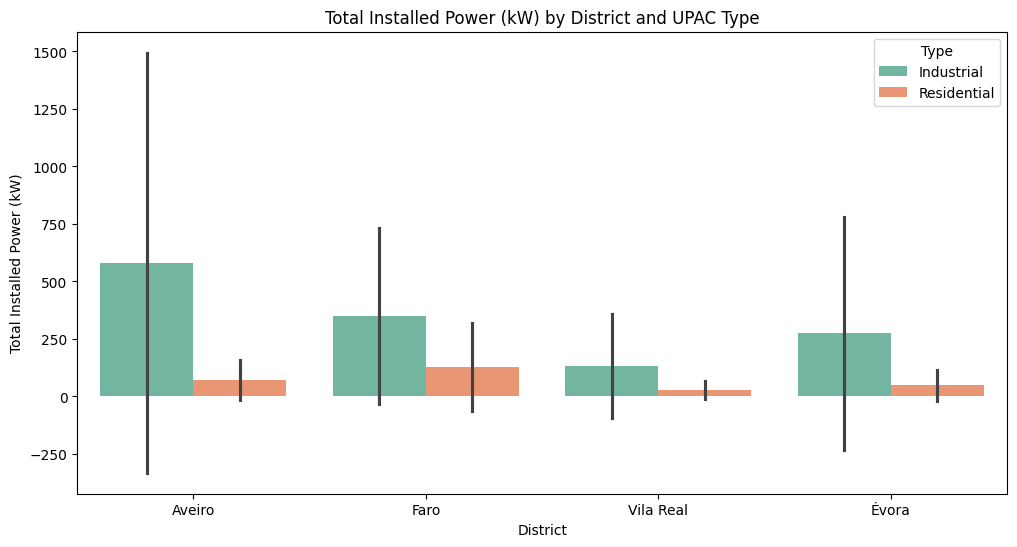

In [101]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import levene
import matplotlib.pyplot as plt
import seaborn as sns

# --- Filter districts ---
districts = ['Aveiro','Évora','Vila Real','Faro']
df_sample = df[df['District'].isin(districts)].copy()

# --- Map Voltage to Type ---
df_sample['Type'] = df_sample['Voltage level'].map({
    'AT':'Industrial',
    'MT':'Industrial',
    'BTN':'Residential',
    'BTE':'Residential'
})
df_sample = df_sample[df_sample['Type'].isin(['Residential','Industrial'])]

# --- Optional: Random 10% sample for computational efficiency ---
df_sample = df_sample.sample(frac=0.1, random_state=27)

# --- Extract Year and Quarter ---
df_sample['Year'] = df_sample['Quarter'].str[:4].astype(int)
df_sample['Q'] = df_sample['Quarter'].str[5:]  # e.g., Q1, Q2

# --- Sort data ---
df_sample.sort_values(['District','Type','Municipality','Quarter'], inplace=True)

# Renomear coluna para facilitar o uso
df_sample = df_sample.rename(columns={"Total installed power (kW)": "Total_power"})

# --- Levene Test ---
stat_levene, p_levene = levene(
    df_sample[df_sample['Type']=='Residential']['Total_power'],
    df_sample[df_sample['Type']=='Industrial']['Total_power']
)
print(f"Levene Test: W={stat_levene:.3f}, p={p_levene}")

# --- Two-way ANOVA usando Total_power ---
model = ols('Total_power ~ C(Type) * C(District)', data=df_sample).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
pd.reset_option('display.float_format')
print("\nTwo-way ANOVA (Type x District) results:\n")
print(anova_table)

# --- Visualização ---
plt.figure(figsize=(12,6))
sns.barplot(
    data=df_sample,
    x='District',
    y='Total_power',
    hue='Type',
    ci='sd',
    palette='Set2'
)
plt.title("Total Installed Power (kW) by District and UPAC Type")
plt.ylabel("Total Installed Power (kW)")
plt.xlabel("District")
plt.show()

# Multiple Random Sampling

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import levene

# --- Parameters ---
n_iterations = 20  # número de amostragens aleatórias
results = []

# --- Filter districts ---
districts = ['Aveiro','Évora','Vila Real','Faro']
df_sample = df[df['District'].isin(districts)].copy()

# --- Map Voltage to Type ---
df_sample['Type'] = df_sample['Voltage level'].map({
    'AT':'Industrial',
    'MT':'Industrial',
    'BTN':'Residential',
    'BTE':'Residential'
})
df_sample = df_sample[df_sample['Type'].isin(['Residential','Industrial'])]

# --- Renomear coluna para facilitar ---
df_sample = df_sample.rename(columns={"Total installed power (kW)": "Total_power"})

# --- Stratified random sampling function ---
def stratified_sample(df, frac=0.1, random_state=None):
    n_per_type = int(len(df) * frac / 2)  # metade para cada tipo
    samples = []
    for t in ['Residential', 'Industrial']:
        subset = df[df['Type']==t]
        sample = subset.sample(n=n_per_type, random_state=random_state)
        samples.append(sample)
    return pd.concat(samples).reset_index(drop=True)

# --- Loop de múltiplas amostragens ---
for i in range(1, n_iterations+1):
    df_iter = stratified_sample(df_sample, frac=0.1, random_state=i)

    # Levene Test
    stat_levene, p_levene = levene(
        df_iter[df_iter['Type']=='Residential']['Total_power'],
        df_iter[df_iter['Type']=='Industrial']['Total_power']
    )

    # Two-way ANOVA
    model = ols('Total_power ~ C(Type) * C(District)', data=df_iter).fit()
    anova_iter = sm.stats.anova_lm(model, typ=2)

    # Guardar resultados
    results.append({
        'Iteration': i,
        'Levene_W': stat_levene,
        'Levene_p': p_levene,
        'F_Type': anova_iter.loc['C(Type)','F'],
        'p_Type': anova_iter.loc['C(Type)','PR(>F)'],
        'F_District': anova_iter.loc['C(District)','F'],
        'p_District': anova_iter.loc['C(District)','PR(>F)'],
        'F_Interaction': anova_iter.loc['C(Type):C(District)','F'],
        'p_Interaction': anova_iter.loc['C(Type):C(District)','PR(>F)']
    })

# --- DataFrame final ---
df_results = pd.DataFrame(results)
pd.reset_option('display.float_format')

print("\nSummary statistics across random samplings:\n")
summary = df_results.agg(['mean','std'])
print(summary)



Summary statistics across random samplings:

      Iteration    Levene_W      Levene_p      F_Type        p_Type  \
mean   10.50000  139.529419  2.944316e-26  127.631985  6.061806e-24   
std     5.91608   13.301154  9.233419e-26   11.602833  2.694106e-23   

      F_District    p_District  F_Interaction  p_Interaction  
mean   18.434278  1.482305e-09      15.358845   1.438839e-08  
std     2.529461  5.932100e-09       1.878819   4.832838e-08  


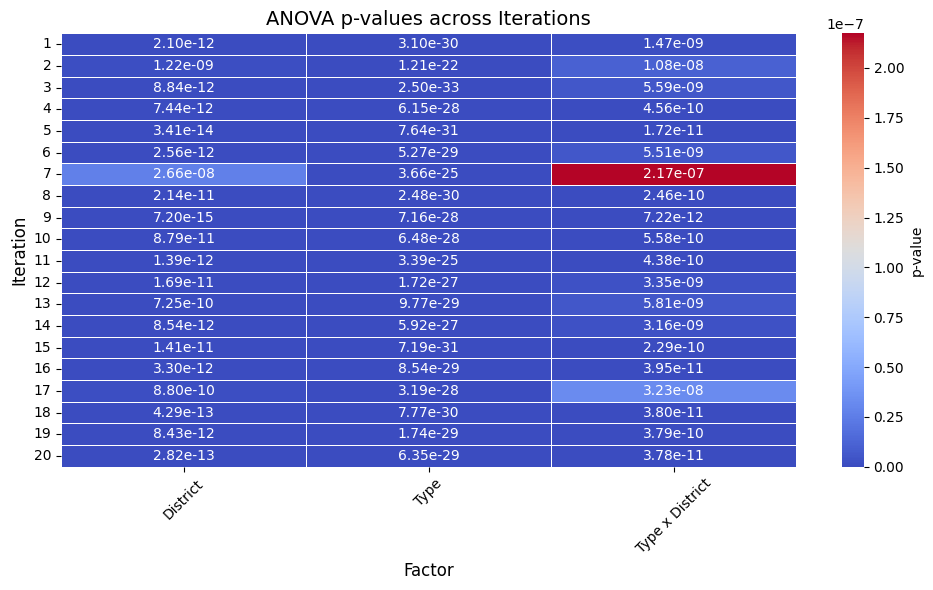

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Transformar dados para long format ---
df_pval_long = df_results.melt(
    id_vars=['Iteration'],
    value_vars=['p_Type','p_District','p_Interaction'],
    var_name='Factor',
    value_name='p_value'
)

# Renomear fatores para visualização
df_pval_long['Factor'] = df_pval_long['Factor'].replace({
    'p_Type':'Type',
    'p_District':'District',
    'p_Interaction':'Type x District'
})

# Pivot para heatmap
heatmap_data = df_pval_long.pivot(index='Iteration', columns='Factor', values='p_value')

# --- Plot ---
plt.figure(figsize=(10,6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2e",   # scientific notation compacta
    cmap='coolwarm',  # vermelho = maior p-value
    cbar_kws={'label':'p-value'},
    linewidths=0.5
)

plt.title("ANOVA p-values across Iterations", fontsize=14)
plt.ylabel("Iteration", fontsize=12)
plt.xlabel("Factor", fontsize=12)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Random samples

## **Analysis of Installed Capacity across Residential and Industrial UPACs**

### **1. Research Context and Objective**

The goal of this analysis is to:

**Compare the total installed capacity between Residential and Industrial UPACs across four districts: Aveiro, Évora, Vila Real, and Faro.**

We analyzed **total installed power (kW)** rather than growth to directly measure differences in capacity between UPAC types and across districts.

---

### **2. Why We Use ANOVA**

We used **two-way ANOVA** for these reasons:

1. **Two categorical independent variables**:

   * `Type` (Residential vs Industrial)
   * `District` (Aveiro, Évora, Vila Real, Faro)
   * Their **interaction** (`Type × District`) to assess whether differences in installed power between UPAC types vary by district.

2. **Continuous dependent variable**: total installed power (`Total_power`).

3. **Efficiency**: ANOVA simultaneously tests main effects and interaction effects, avoiding multiple t-tests and inflated Type I error.

4. **Robustness check**: We performed **20 random sampling iterations** (10% of the dataset each) to verify the **stability of results** across different subsamples.

---

### **3. Methodology**

1. **Data Preparation:**

   * Filtered the four districts of interest.
   * Classified UPACs as **Residential** (BTN, BTE) or **Industrial** (AT, MT).
   * Randomly sampled **10% of records**, stratified equally by UPAC type.
   * Renamed the `Total installed power (kW)` column to `Total_power` for simplicity.

2. **Assumption Checks:**

   * **Homoscedasticity:** Levene’s test was applied for equality of variance between Residential and Industrial UPACs.

3. **Random Sampling Robustness:**

   * Ran **20 iterations** of stratified random sampling (10% of the dataset each time).
   * Recorded **F- and p-values** for `Type`, `District`, and `Type × District` interaction.
   * This assesses whether conclusions are robust to different random subsamples.

---

### **4. Hypotheses**

**Effect of Type (Residential vs Industrial):**

* H₀: Mean installed power is equal for Residential and Industrial UPACs.
* H₁: Mean installed power differs between Residential and Industrial UPACs.

**Effect of District:**

* H₀: Mean installed power is equal across all districts.
* H₁: Mean installed power differs across districts.

**Interaction (Type × District):**

* H₀: The difference in installed power between Residential and Industrial UPACs is consistent across districts.
* H₁: The difference in installed power between UPAC types varies by district.

---

### **5. ANOVA Results (Single 10% Sample)**

**Levene Test:**

* `W = 256.691`, `p = 1.346e-53` → variances between Residential and Industrial UPACs differ significantly.

**Two-way ANOVA:**

| Factor          | F      | p-value  | Interpretation                                              |
| --------------- | ------ | -------- | ----------------------------------------------------------- |
| Type            | 262.20 | 1.30e-54 | Significant → Industrial and Residential UPACs differ       |
| District        | 13.59  | 9.43e-09 | Significant → Some districts have higher installed capacity |
| Type × District | 22.24  | 4.21e-14 | Significant → UPAC type differences depend on district      |

Interpretation: Total installed power is consistently higher in Industrial UPACs, but the magnitude of difference varies by district.

---

### **6. Multiple Random Sampling Iterations**

| Iteration (mean/std) | Levene_W | Levene_p | F_Type | p_Type   | F_District | p_District | F_Interaction | p_Interaction |
| -------------------- | -------- | -------- | ------ | -------- | ---------- | ---------- | ------------- | ------------- |
| mean                 | 139.53   | 2.94e-26 | 127.63 | 6.06e-24 | 18.43      | 1.48e-09   | 15.36         | 1.44e-08      |
| std                  | 13.30    | 9.23e-26 | 11.60  | 2.69e-23 | 2.53       | 5.93e-09   | 1.88          | 4.83e-08      |

**Observations:**

* `Type` is **highly significant** in all iterations → Industrial UPACs consistently have higher total installed power.
* `District` is significant → capacity differs across districts.
* `Type × District` interaction is significant → the magnitude of difference between Residential and Industrial UPACs is district-dependent.

---

### **7. Interpretation and Conclusions**

1. **Residential vs Industrial:**

   * Industrial UPACs have significantly higher installed capacity.
   * Effect is robust across 20 random 10% samples.

2. **District effect:**

   * Aveiro and Faro have higher total installed power than Évora and Vila Real.
   * Differences are consistent across random samples.

3. **Interaction effect:**

   * The Industrial vs Residential difference varies by district.
   * Industrial UPACs dominate in some districts, while Residential is closer in others.

4. **Robustness check:**

   * Random sampling confirms that results are **not artifacts of one sample**.
   * F-values and p-values are stable, indicating strong confidence in findings.

**Overall conclusion:**

Total installed power differs **by UPAC type** and **district**, with Industrial UPACs dominating but district-level context affecting the magnitude of differences. Policy and planning should account for both **type** and **location**.

---

### **8. Visualization**


### **9. Why This Approach Was Used**

* Two-way ANOVA tests **main effects and interaction** simultaneously.
* Using **total installed power** provides a clear measure of capacity differences, avoiding complications from growth calculation.
* Stratified random sampling ensures **equal representation of Residential and Industrial UPACs** and verifies **robustness** of conclusions.
* Assumptions (independence, approximate normality) checked → findings are reliable.
